<a href="https://colab.research.google.com/github/Banhivaroy/IDEAS_TIHub_Project_Submission/blob/main/Copy_of_02_exploratory_data_analysis_with_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

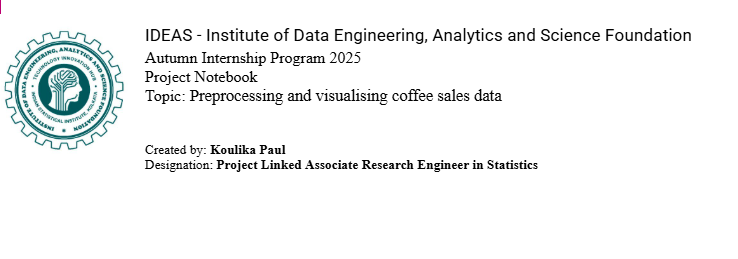

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')
coffee_data=pd.read_csv("/content/drive/MyDrive/Coffee_sales.csv")
coffee_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

In [ ]:
num_columns = coffee_data.shape[1]
print("number of columns : ",num_columns)


11


In [ ]:
duplicate = coffee_data.columns[coffee_data.columns.duplicated()]
print(list(duplicate))

[]


In [ ]:
missing_values = coffee_data.isnull().sum().sum()
print(missing_values)

0


***Basic statistics of the data***

In [ ]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [ ]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

***Average money for each year***

In [ ]:
grouped_data=coffee_data.groupby('Year')['money'].agg("mean")
grouped_data

,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

In [ ]:
print("\nType of grouped_data:", type(grouped_data))
print("Dtype of grouped_data values:", grouped_data.dtypes)


Type of grouped_data: <class 'pandas.core.series.Series'>
Dtype of grouped_data values: float64


**Q3. Find the maximum money for each month**

In [ ]:
max_money = coffee_data.groupby('Month')['money'].max()
print(max_money)

Month
1     35.76
2     35.76
3     38.70
4     38.70
5     37.72
6     37.72
7     37.72
8     32.82
9     35.76
10    35.76
11    35.76
12    35.76
Name: money, dtype: float64


***Distribution of money over months***

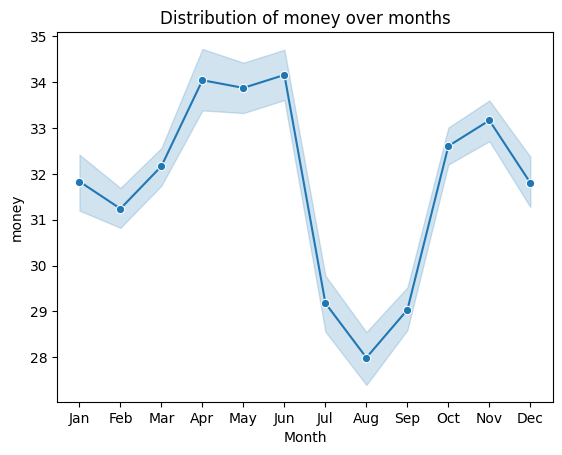

In [ ]:
sns.lineplot(x="Monthsort",y='money',data=coffee_data,marker="o")
plt.xticks(coffee_data["Monthsort"].unique(),coffee_data["Month_name"].unique())
plt.xlabel("Month")
plt.ylabel("money")
plt.title("Distribution of money over months")
plt.show()

***The density of money over years***

<Axes: xlabel='Year', ylabel='money'>

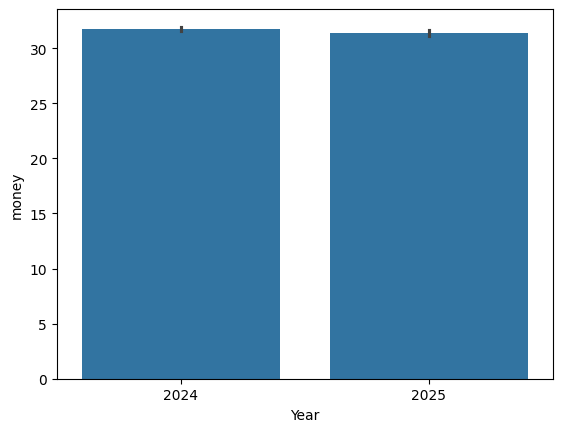

In [ ]:
sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])


**Q4. Find the distribution of money over coffee names**


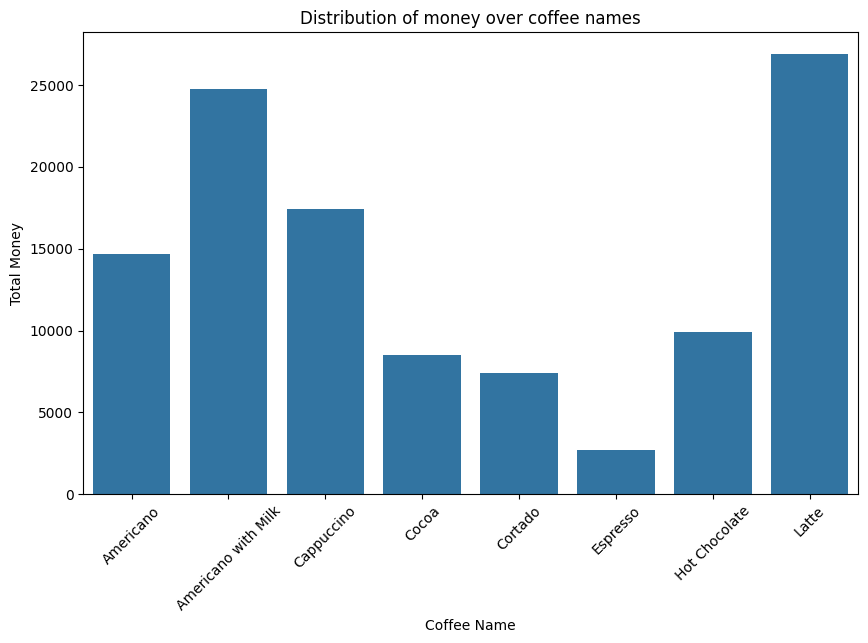

In [ ]:
money_by_coffee = coffee_data.groupby('coffee_name', as_index=False)['money'].sum()
plt.figure(figsize = (10,6))
sns.barplot(x="coffee_name",y="money",data = money_by_coffee)
plt.xticks(rotation=45)
plt.title("Distribution of money over coffee names")
plt.xlabel("Coffee Name")
plt.ylabel("Total Money")
plt.show()

***Times of the Day the dataset holds***

In [ ]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

In [ ]:
coffee_counts = coffee_data['coffee_name'].value_counts()
print(coffee_counts)


coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64


***Max money from coffee_name***

In [ ]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

In [ ]:
avg_money = coffee_data.groupby('Time_of_Day', as_index=False)['money'].mean()
print(avg_money)

  Time_of_Day      money
0   Afternoon  31.643187
1     Morning  30.422693
2       Night  32.890904


***Generate 100 synthetic data rows***

In [ ]:

date_range= date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,date,value
0,2023-01-01,0.041012
1,2023-01-02,1.540649
2,2023-01-03,0.180172
3,2023-01-04,-0.196266
4,2023-01-05,0.133230
...,...,...
95,2023-04-06,9.294296
96,2023-04-07,10.193476
97,2023-04-08,9.379306
98,2023-04-09,10.314520


**Q7. Insert synthetic data into the given data set and analyse as above.**

number of columns :  13
number of duplicate columns :  []
number of missing values :  7094


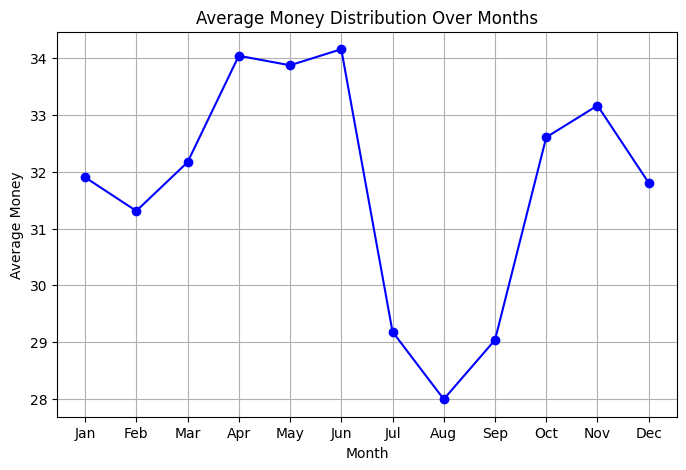

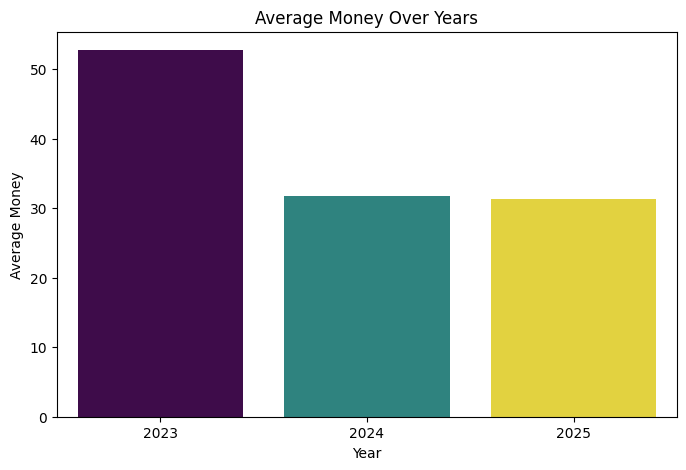

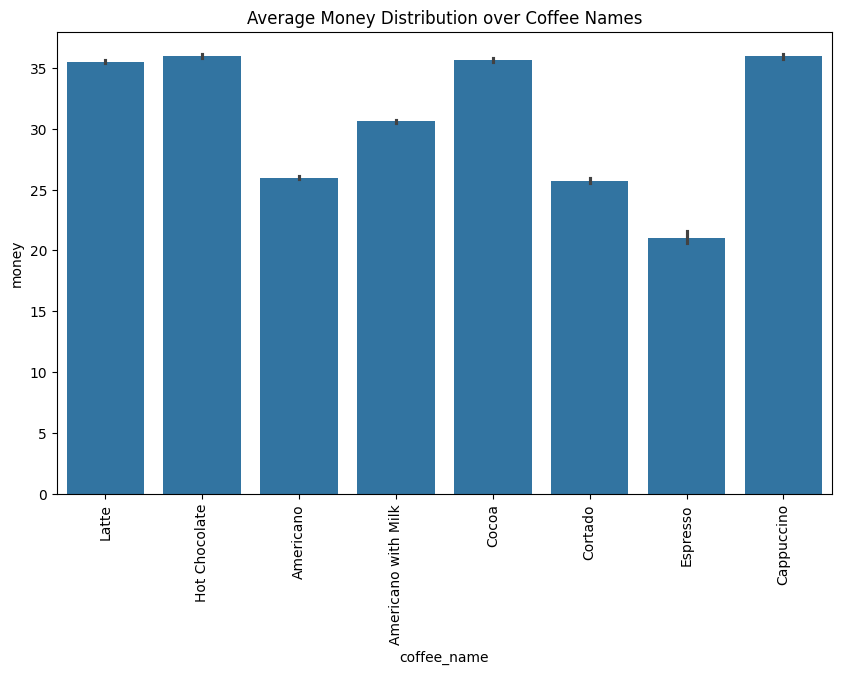

In [3]:

# 1. Insert synthetic data :
synthetic_data = pd.DataFrame({
    "hour_of_day": [9, 15],
    "cash_type": ["cash", "card"],
    "money": [45.5, 60.0],
    "coffee_name": ["Espresso", "Cappuccino"],
    "Time_of_Day": ["Morning", "Evening"],
    "Weekday": ["Mon", "Tue"],
    "Month_name": ["Jan", "Feb"],
    "Weekdaysort": [1, 2],
    "Monthsort": [1, 2],
    "Date": ["2023-01-15", "2023-02-20"],
    "Time": ["09:10:00", "15:45:00"],
    "Month": [1, 2],
    "Year": [2023, 2023]
})
coffee_data = pd.concat([coffee_data, synthetic_data], ignore_index=True)
# 2. Find number of columns, duplicate columns, and missing values :
num_columns = coffee_data.shape[1]
print("number of columns : ",num_columns)
duplicate = coffee_data.columns[coffee_data.columns.duplicated()]
print("number of duplicate columns : ",list(duplicate))
missing_values = coffee_data.isnull().sum().sum()
print("number of missing values : ",missing_values)
# 3. Basic statistics of the data :
basic_stats = coffee_data.describe(include="all")
# 4. Average money for each year :
coffee_data["Date"] = pd.to_datetime(coffee_data["Date"])
coffee_data["Year"] = coffee_data["Date"].dt.year
avg_money_year = coffee_data.groupby("Year")["money"].mean()

# 5. Datatype of grouped_data :
grouped_data = coffee_data.groupby("Year")["money"]
datatype_grouped = type(grouped_data)

# 6. Maximum money for each month :
max_money_month = coffee_data.groupby("Month_name")["money"].max()

# 7. Distribution of money over months (Line Graph) :
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

monthly_avg = coffee_data.groupby("Month_name")["money"].mean().reindex(month_order)

plt.figure(figsize=(8,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker="o", linestyle="-", color="blue")
plt.title("Average Money Distribution Over Months")
plt.xlabel("Month")
plt.ylabel("Average Money")
plt.grid(True)
plt.show()
# 8. Density of money (overall)
yearly_avg = coffee_data.groupby("Year")["money"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=yearly_avg.index, y=yearly_avg.values, hue=yearly_avg.index, palette="viridis", legend=False)
plt.title("Average Money Over Years")
plt.xlabel("Year")
plt.ylabel("Average Money")
plt.show()

# 9. Distribution of money over coffee names :
plt.figure(figsize=(10,6))
sns.barplot(x="coffee_name", y="money", data=coffee_data, estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Average Money Distribution over Coffee Names")
plt.show()

# 10. Times of the Day :
times_of_day = coffee_data["Time_of_Day"].unique()

# 11. Number of coffee types :
num_coffees = coffee_data["coffee_name"].nunique()

# 12. Max money from coffee_name :
max_money_per_coffee = coffee_data.groupby("coffee_name")["money"].max()

# 13. Average money per Time of Day :
avg_money_timeofday = coffee_data.groupby("Time_of_Day")["money"].mean()



